
# Medical Insurance Cost Prediction – Exploratory Data Analysis (EDA)

This notebook performs a comprehensive Exploratory Data Analysis (EDA) on the **Medical Insurance Cost** dataset.
The goal is to:
- Understand the structure and distribution of the data  
- Identify relationships between predictors and medical charges  
- Apply appropriate transformations to improve modeling assumptions  
- Derive statistical insights useful for downstream predictive modeling



## Dataset Description
Typical variables in this dataset include:
- **age**: Age of primary beneficiary  
- **sex**: Gender of the insurance contractor  
- **bmi**: Body Mass Index  
- **children**: Number of dependents  
- **smoker**: Smoking status  
- **region**: Residential region  
- **charges**: Medical insurance cost (Target Variable)

## 1. Data Loading and Initial Inspection

In [1]:
# Importing dependencies
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
os.chdir('D:/ds/ml/Medical_Insurance_Cost-main')

In [3]:
# Load csv
df=pd.read_csv('insurance.csv')

In [4]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [6]:
df.nunique()

age           47
sex            2
bmi          548
children       6
smoker         2
region         4
charges     1337
dtype: int64

In [7]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


## Distribution of Charges

Text(0.5, 1.0, 'Distribution of Medical Insurance Charges')

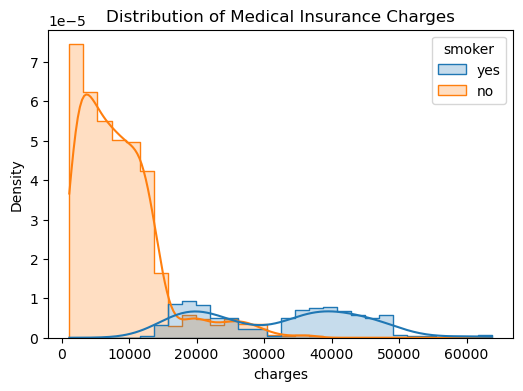

In [8]:
plt.figure(figsize=(6, 4))

sns.histplot(
    data=df,
    x='charges',
    hue='smoker',
    stat='density',
    element='step',
    kde = True,
    
)

plt.title('Distribution of Medical Insurance Charges')

### Initial Observations

- No missing values observed
- Mix of numerical and categorical variables
- Target variable (charges) shows large variability

## 2. Target Variable Transformation

**Why Log Transformation?**

Medical insurance charges typically exhibit:

- Strong **right skewness**
- **Heteroscedasticity** (variance increases with mean)

A log transformation:

- Stabilizes variance
- Improves linearity
- Makes residuals closer to normal (important for linear models)

We create a new transformed target:

> **`log(charges)`**

In [9]:
# log transformation of chrages
df['log_charges'] = np.log(df['charges'])
df[['charges', 'log_charges']].head()

,charges,log_charges
0,16884.92400,9.734176
1,1725.55230,7.453302
2,4449.46200,8.400538
3,21984.47061,9.998092
4,3866.85520,8.260197



## 3. Statistical Insights

### Summary Statistics
We analyze both raw and log-transformed charges to understand:
- Central tendency (mean, median)
- Spread (standard deviation, IQR)
- Skewness reduction after transformation


In [10]:
df[['charges', 'log_charges']].describe()

,charges,log_charges
count,1338.000000,1338.000000
mean,13270.422265,9.098659
std,12110.011237,0.919527
min,1121.873900,7.022756
25%,4740.287150,8.463853
50%,9382.033000,9.146552
75%,16639.912515,9.719558
max,63770.428010,11.063045



### Key Observations
- **Charges** are highly skewed with extreme outliers  
- **Log-charges** exhibit a more symmetric distribution  
- Mean and median are closer after log transformation  

This suggests **log(charges)** is more suitable for:
- Linear Regression  
- Regularized models  
- Statistical inference


## 4. Relationship Between Predictors and Target

### Smoking Status
Smoking is typically the strongest predictor of insurance cost.
We compare distributions across smoker vs non-smoker groups.


In [11]:
df.groupby('smoker')[['charges', 'log_charges']].mean()

,charges,log_charges
smoker,,
no,8434.268298,8.788232
yes,32050.231832,10.304110


### Interpretation
- Smokers incur **significantly higher medical costs**
- Difference remains large even on the log scale
- Confirms smoking as a **critical risk factor**

### 5(a). Distribution of Charges vs Smoker

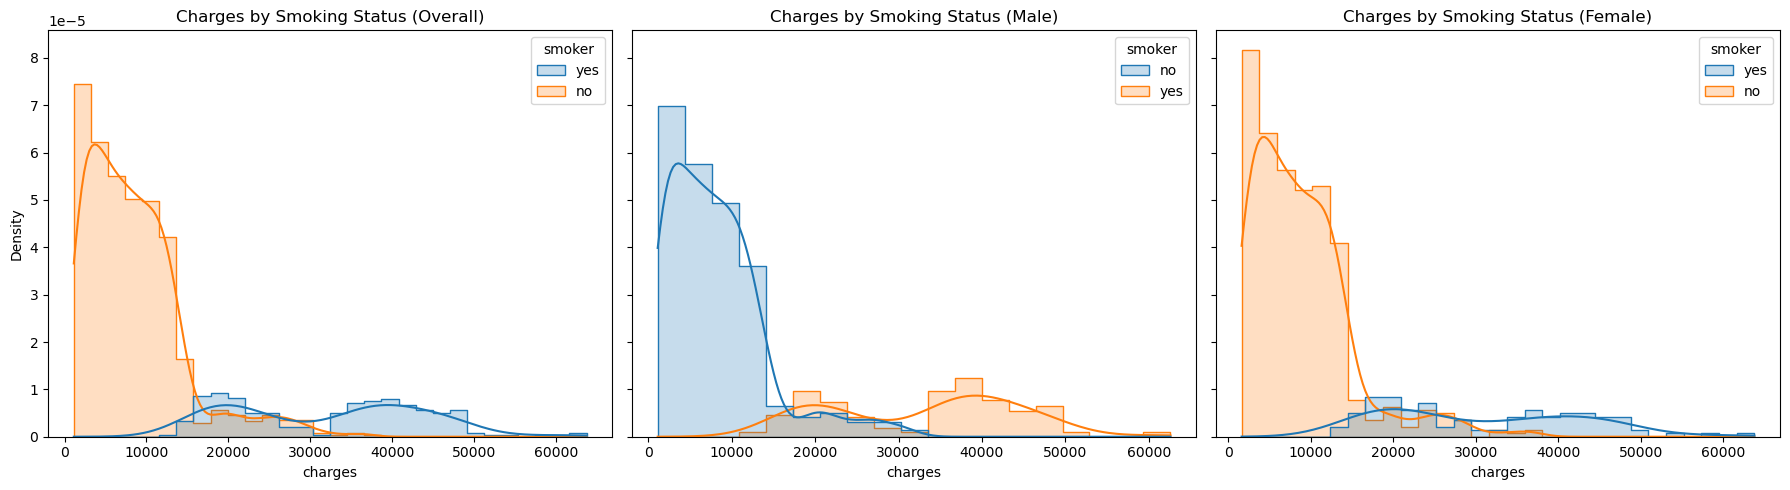

In [12]:
fig, axes = plt.subplots(1, 3, figsize=(18, 5), sharey=True)

# Overall
sns.histplot(
    data=df, 
    x='charges',
    kde=True, 
    hue='smoker',
    element='step',
    stat='density',
    ax=axes[0]
)
axes[0].set_title('Charges by Smoking Status (Overall)')

# Male only
sns.histplot(
    data=df[df.sex == 'male'], 
    x='charges',
    kde=True, 
    hue='smoker',
    element='step', 
    stat='density',
    ax=axes[1]
)
axes[1].set_title('Charges by Smoking Status (Male)')

# Female only
sns.histplot(
    data=df[df.sex == 'female'], 
    x='charges',
    kde=True,
    hue='smoker',
    element='step',
    stat='density',
    ax=axes[2]
)
axes[2].set_title('Charges by Smoking Status (Female)')

plt.tight_layout()
plt.show()

### 5(b). Distribution of Log Charges vs Smoker

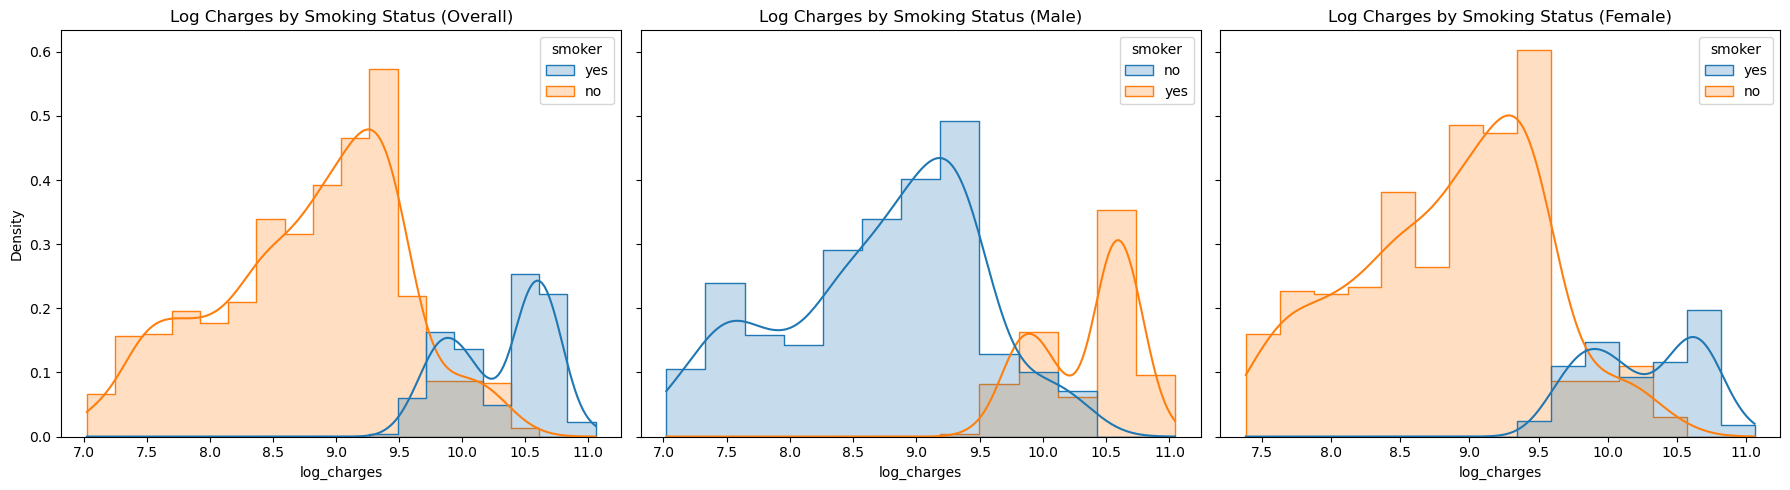

In [13]:
fig, axes = plt.subplots(1, 3, figsize=(18, 5), sharey=True)

# Overall
sns.histplot(
    data=df,
    x='log_charges',
    kde=True,
    hue='smoker',
    element='step',
    stat='density',
    ax=axes[0]
)
axes[0].set_title('Log Charges by Smoking Status (Overall)')

# Male only
sns.histplot(
    data=df[df.sex == 'male'],
    x='log_charges',
    kde=True,
    hue='smoker',
    element='step',
    stat='density',
    ax=axes[1]
)
axes[1].set_title('Log Charges by Smoking Status (Male)')

# Female only
sns.histplot(
    data=df[df.sex == 'female'],
    x='log_charges',
    kde=True,
    hue='smoker',
    element='step',
    stat='density',
    ax=axes[2]
)
axes[2].set_title('Log Charges by Smoking Status (Female)')

plt.tight_layout()
plt.show()


## Interpretation & Conclusions

### Raw Charges Distribution (Top Row)

**Overall**
- Medical insurance charges exhibit strong right skewness.
- A small proportion of individuals incur extremely high costs.
- Smokers dominate the upper tail of the distribution.

**Conclusion:**  
Raw charges violate normality assumptions and are heavily influenced by outliers, particularly among smokers.

**Male**
- Male smokers show a clear rightward shift with substantially higher charges.
- Non-smoker males are concentrated in the lower cost range.
- Separation between smoker and non-smoker groups is pronounced.

**Conclusion:**  
Smoking has a strong impact on medical insurance costs among males, driextreme values.

**Female**
- Female smokers incur higher charges than non-smokers.
- Variability among smokers is large but slightly lower compared to males.

**Conclusion:**  
Smoking increases insurance costs for females as well, though extreme values appear marginally less frequent than in males.

---

### Log-Transformed Charges Distribution (Bottom Row)

**Overall**
- Log transformation substantially reduces skewness.
- Distributions become more symmetric and closer to normal.
- Clear separation between smokers and non-smokers remains.

**Conclusion:**  
Log transformation stabilizes variance while preserving the smoking effect, improvuitability for statistical modeling.

**Male**
- On the log scale, smokers show a consistent upward shift.
- Reduced overlap between smoker and non-smoker distributions.
- Distribution shape is closer to normal.

**Conclusion:**  
Among males, smoking has a strong multiplicative effect on insurance chargupporting the use of log-transformed outcomes.

**Female**
- Distribution shape improves after log transformation.
- Smoking effect remains evident with consistently higher costs.

**Conclusion:**  
Smoking significantly increases medical costs for females, and log transformation enhances interpretability.

---

### Key Takeaways

- Smoking is the strongest driver of medical insurance charges.
- The effect persists across genders and after transformation.
- Raw charges are non-normal and influenced by extreme valuesLog(charges) improves modeling assumptions and interpretability.

### Modeling Implications

- Use **log(charges)** as the target variable.
- Include **smoker** as a key predictor.
- Consider **sex × smoker interaction**.
- Linear model coefficients can be interpreted as **percentage change in costs**.


## 6(a). Scatterplot of Charges vs Smoker

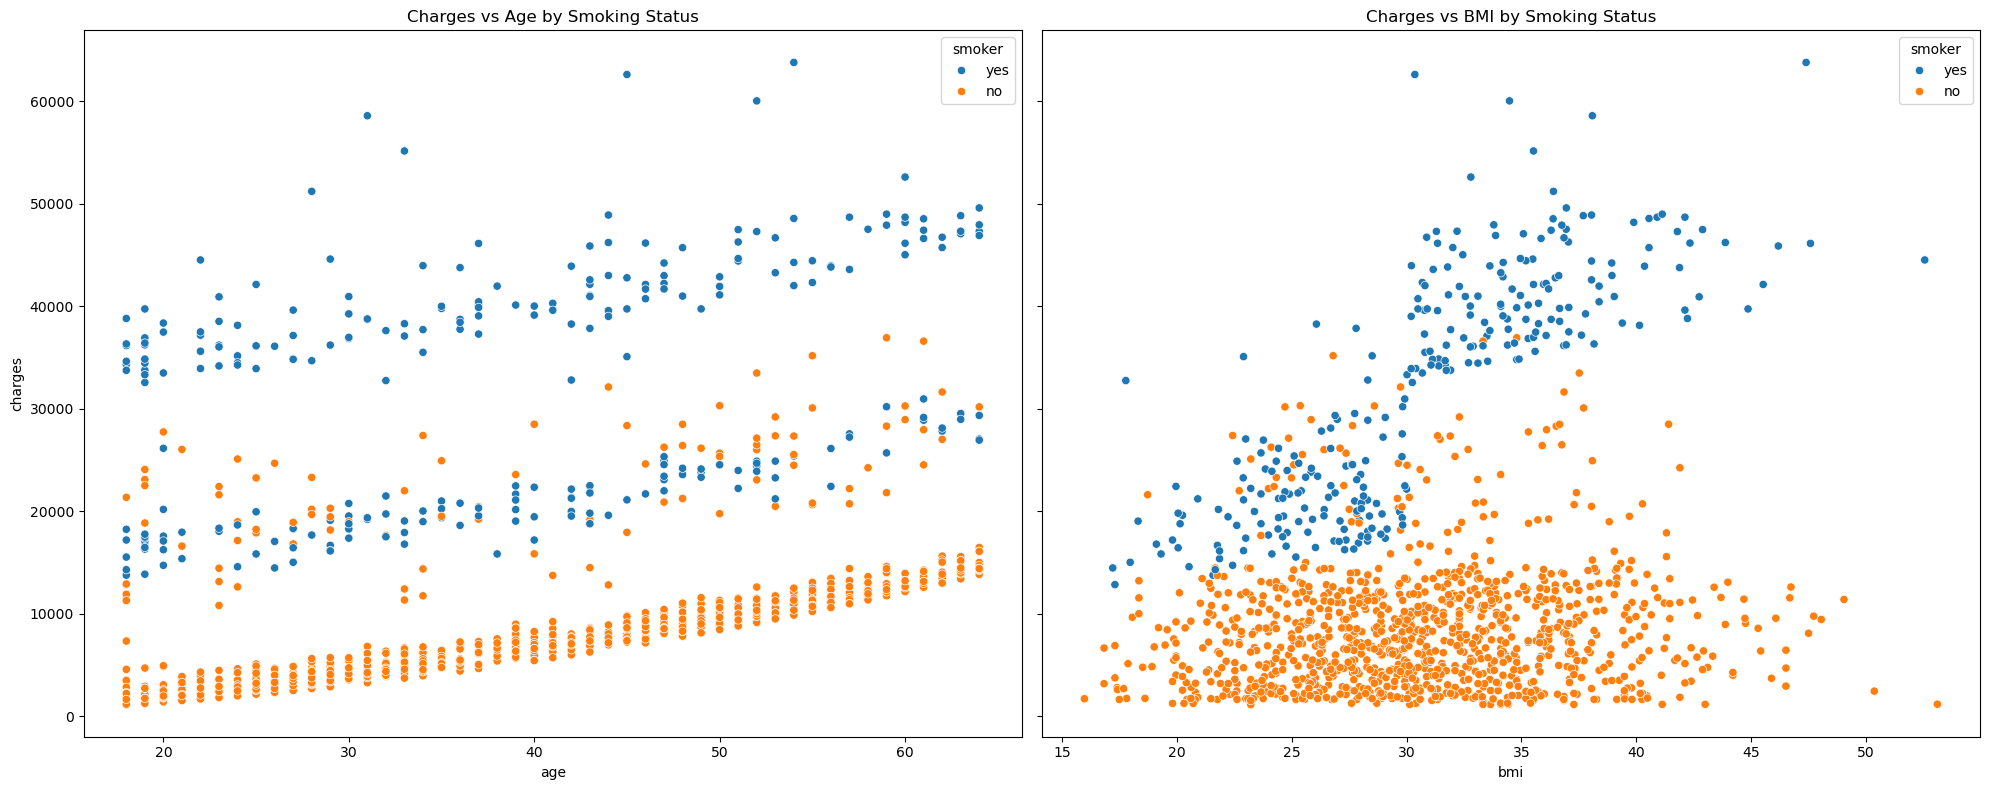

In [14]:
fig, axes = plt.subplots(1, 2, figsize=(20, 8), sharey=True)

sns.scatterplot(
    x=df['age'],
    y=df['charges'],
    hue=df['smoker'],
    ax=axes[0]
)
axes[0].set_title('Charges vs Age by Smoking Status')

sns.scatterplot(
    x=df['bmi'],
    y=df['charges'],
    hue=df['smoker'],
    ax=axes[1]
)
axes[1].set_title('Charges vs BMI by Smoking Status')

plt.tight_layout()
plt.show()

## 6(b). Scatterplot of Log Charges vs Smoker

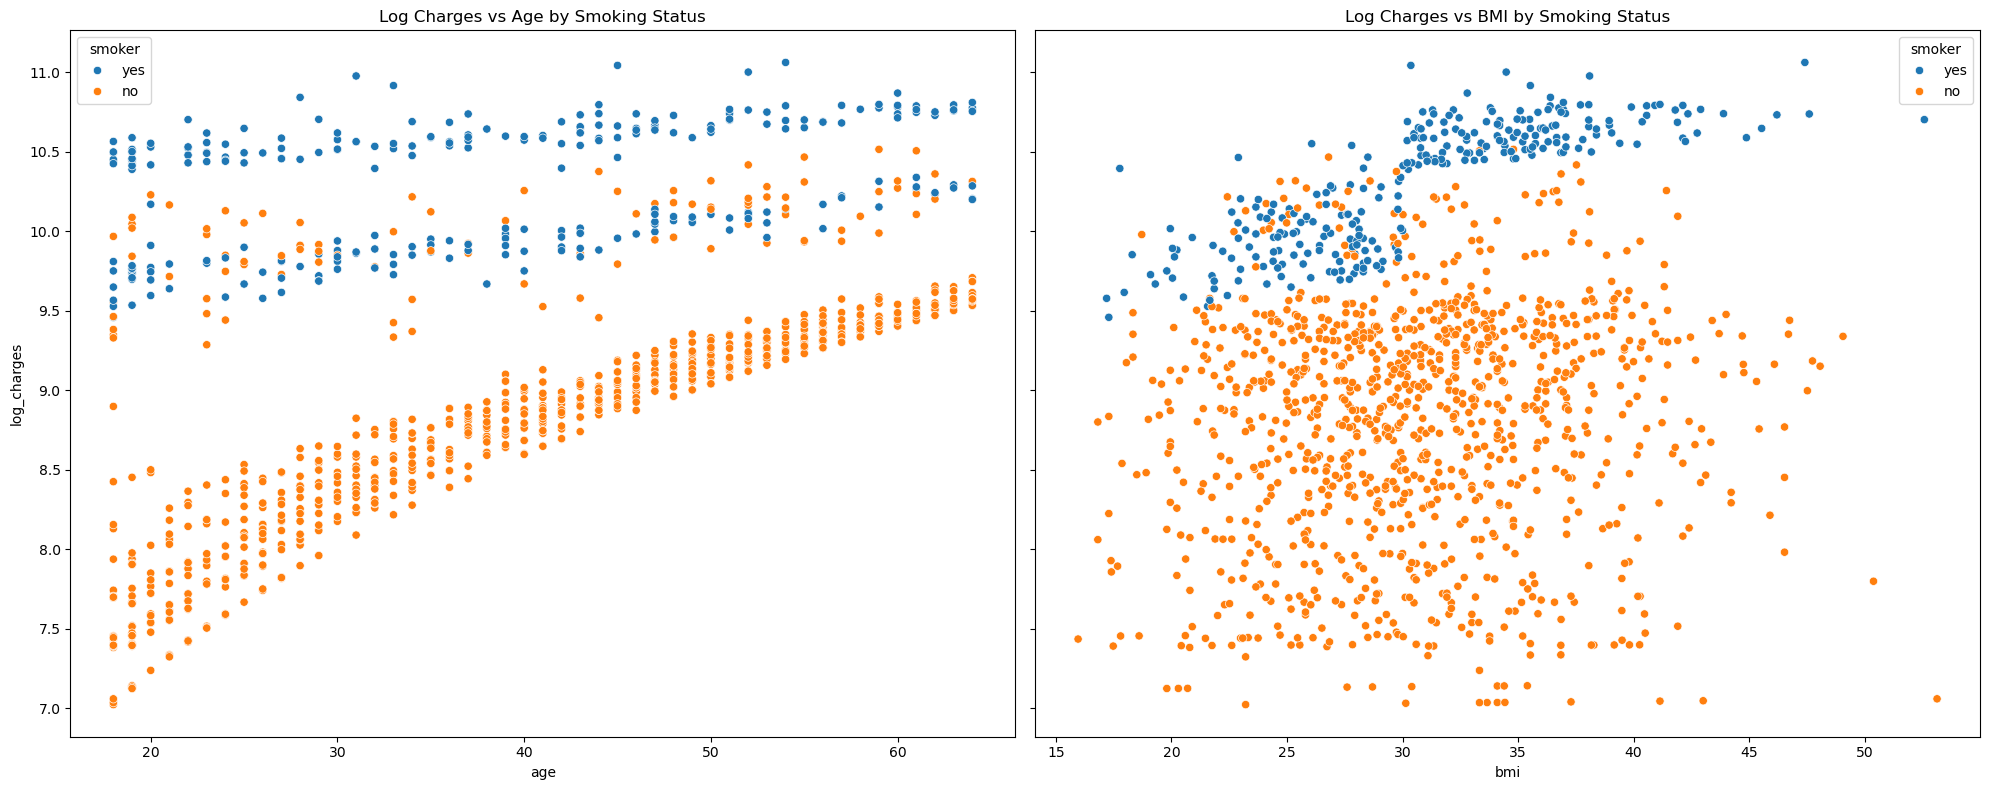

In [15]:
fig, axes = plt.subplots(1, 2, figsize=(20, 8), sharey=True)

sns.scatterplot(
    x=df['age'],
    y=df['log_charges'],
    hue=df['smoker'],
    ax=axes[0]
)
axes[0].set_title('Log Charges vs Age by Smoking Status')

sns.scatterplot(
    x=df['bmi'],
    y=df['log_charges'],
    hue=df['smoker'],
    ax=axes[1]
)
axes[1].set_title('Log Charges vs BMI by Smoking Status')

plt.tight_layout()
plt.show()

## Interpretation & Conclusions

### Charges vs Age and BMI (Raw Scale)

**Charges vs Age**
- Medical insurance charges increase with age for both smokers and non-smokers.
- Smokers consistently incur substantially higher charges across all age groups.
- The gap between smokers and non-smokers widens with increasing age.
- Presence of extreme values indicates strong right skewness and heteroscedasticity.

**Interpretation:**  
Age has a positive association with medical charges, and smoking amplifies this effect, leading to significantly higher costs among older smokers.

**Charges vs BMI**
- Among smokers, higher BMI is associated with markedly higher medical charges.
- Non-smokers show relatively lower charges across the BMI range, with weaker association.
- Smokers with high BMI account for most of the extreme high-cost observations.

**Interpretation:**  
BMI interacts with smoking status, with obese smokers experiencing disproportionately high medical expenses.

---

### Log(Charges) vs Age and BMI

**Log(Charges) vs Age**
- Log transformation reduces skewness and stabilizes variance.
- A clear linear relationship emerges between age and log-transformed charges.
- Smoking remains a strong differentiating factor, with smokers consistently above non-smokers.

**Interpretation:**  
On the log scale, age shows an approximately linear relationship with charges, supporting linear regression assumptions.

**Log(Charges) vs BMI**
- Variance is substantially reduced after log transformation.
- Smokers exhibit a clear upward shift in log charges with increasing BMI.
- Non-smokers show weaker dependence on BMI.

**Interpretation:**  
Log transformation clarifies the multiplicative effect of BMI on charges, particularly among smokers.

---

### Key Takeaways

- Smoking is the strongest determinant of medical insurance charges.
- Age and BMI both positively influence charges, with stronger effects among smokers.
- Raw charges exhibit non-normality and heteroscedasticity.
- Log transformation improves interpretability and modeling suitability.

### Modeling Implications

- Use **log(charges)** as the response variable.
- Include **age**, **BMI**, and **smoker** as key predictors.
- Consider interaction terms such as **age × smoker** and **BMI × smoker**.
- Coefficients from log-linear models can be interpreted as percentage changes in medical costs.


## 7. Mean Distribution of Numeric Variables Across Regions


In [16]:
numeric_df = df.select_dtypes(include='number')
numeric_df['region'] = df['region']
region_group = numeric_df.groupby('region').mean()

In [17]:
region_group

,age,bmi,children,charges,log_charges
region,,,,,
northeast,39.268519,29.173503,1.046296,13406.384516,9.168768
northwest,39.196923,29.199785,1.147692,12417.575374,9.069733
southeast,38.939560,33.355989,1.049451,14735.411438,9.122402
southwest,39.455385,30.596615,1.141538,12346.937377,9.031098


In [18]:
region_group.index

Index(['northeast', 'northwest', 'southeast', 'southwest'], dtype='object', name='region')

In [19]:
region_group['charges']

region
northeast    13406.384516
northwest    12417.575374
southeast    14735.411438
southwest    12346.937377
Name: charges, dtype: float64

## 8(a). Region-wise Comparison of Mean Medical Insurance Charges


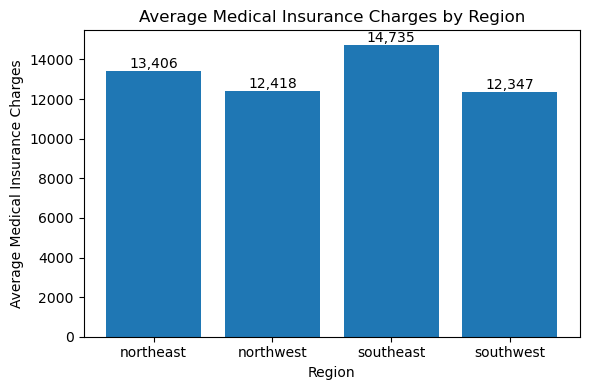

In [20]:
plt.figure(figsize=(6, 4))

bars = plt.bar(
    x=region_group.index,
    height=region_group['charges']
)

plt.xlabel('Region')
plt.ylabel('Average Medical Insurance Charges')
plt.title('Average Medical Insurance Charges by Region')

# Add value labels on top of bars
for bar in bars:
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        height,
        f'{height:,.0f}',
        ha='center',
        va='bottom'
    )

plt.tight_layout()
plt.show()


## 8(b). Average Medical Insurance Charges by Number of Children

In [21]:
numeric1_df = df.select_dtypes(include='number')
numeric1_df['children'] = df['children']
children_group = numeric1_df.groupby('children').mean()
children_group

,age,bmi,charges,log_charges
children,,,,
0,38.444251,30.550296,12365.975602,8.935174
1,39.453704,30.623148,12731.171832,9.094811
2,39.445833,30.978104,15073.563734,9.298261
3,41.566879,30.684331,15355.318367,9.368913
4,39.000000,31.391200,13850.656311,9.359017
5,35.611111,29.605000,8786.035247,9.001097


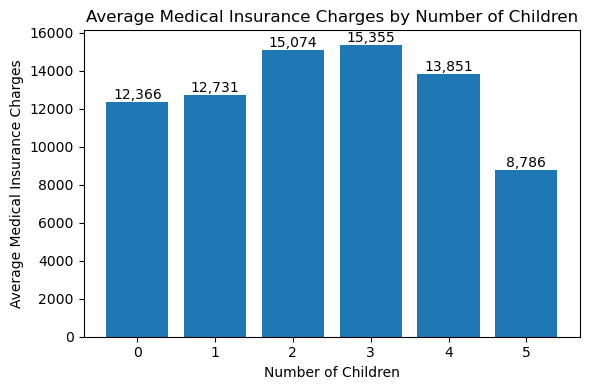

In [22]:
plt.figure(figsize=(6, 4))

bars = plt.bar(
    x=children_group.index,
    height=children_group['charges']
)

plt.xlabel('Number of Children')
plt.ylabel('Average Medical Insurance Charges')
plt.title('Average Medical Insurance Charges by Number of Children')

# Add value labels on top of bars
for bar in bars:
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        height,
        f'{height:,.0f}',
        ha='center',
        va='bottom'
    )

plt.tight_layout()
plt.show()

## Interpretation: Average Medical Insurance Charges by Number of Children

- Average insurance charges show a **slight increase** as the number of children rises from 0 to 3.
- The increase is **not monotonic**; charges do not consistently rise with each additional child.
- Individuals with **5 children** show a noticeably lower average charge, likely due to a **small sample size** in this category.
- Overall variation in mean charges across children groups is **modest** compared to the effects of smoking or age.

### Conclusion
The number of children has a **weak and non-linear association** with medical insurance charges. While having more dependents may marginally increase costs, children alone is not a strong predictor of insurance expenses and may be more relevant through interactions with other variables.


In [23]:
dict1={'no':0,'yes':1}
dict2={'male':1,'female':0}
dict3={'southeast':1,'southwest':2,'northwest':3,'northeast':4}
df['smoker']=df.smoker.map(dict1)
df['sex']=df.sex.map(dict2)
df['region']=df.region.map(dict3)

## 9. Correlation Analysis

In [24]:
df.corr()

,age,sex,bmi,children,smoker,region,charges,log_charges
age,1.000000,-0.020856,0.109272,0.042469,-0.025019,0.006308,0.299008,0.527834
sex,-0.020856,1.000000,0.046371,0.017163,0.076185,-0.012816,0.057292,0.005632
bmi,0.109272,0.046371,1.000000,0.012759,0.003750,-0.262754,0.198341,0.132669
children,0.042469,0.017163,0.012759,1.000000,0.007673,0.001205,0.067998,0.161336
smoker,-0.025019,0.076185,0.003750,0.007673,1.000000,-0.038873,0.787251,0.665506
region,0.006308,-0.012816,-0.262754,0.001205,-0.038873,1.000000,-0.039473,0.019711
charges,0.299008,0.057292,0.198341,0.067998,0.787251,-0.039473,1.000000,0.892964
log_charges,0.527834,0.005632,0.132669,0.161336,0.665506,0.019711,0.892964,1.000000


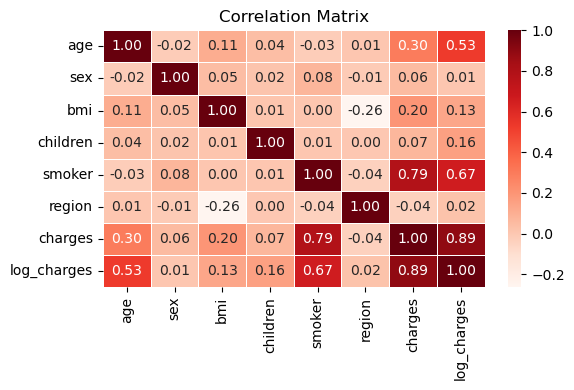

In [25]:
plt.figure(figsize=(6, 4))

sns.heatmap(
    df.corr(),
    cmap='Reds',
    annot=True,
    fmt='.2f',
    linewidths=0.5
)

plt.title('Correlation Matrix')
plt.tight_layout()
plt.show()

## Correlation Analysis: Interpretation & Conclusions

The correlation heatmap summarizes the linear relationships between predictors and medical insurance charges.

### Key Observations

- **Smoking status** shows a **strong positive correlation** with charges (~0.79), indicating that smokers incur substantially higher medical insurance costs.
- **Age** has a **moderate positive correlation** (~0.30) with charges, suggesting that medical expenses tend to increase as age increases.
- **BMI** exhibits a **weak-to-moderate positive correlation** (~0.20) with charges, indicating a modest association between higher BMI and increased medical costs.
- **Children**, **sex**, and **region** have **very weak correlations** with charges, implying limited direct linear influence on insurance costs.
- **Region** shows near-zero correlation, suggesting minimal regional impact on charges in this dataset.

### Interpretation

- Smoking is the **dominant driver** of medical insurance charges among all variables.
- Age and BMI contribute positively to charges but to a lesser extent than smoking.
- The low correlations for children, sex, and region suggest that their effects may be weak, non-linear, or dependent on interactions with other variables.

### Important Note

Correlation measures **linear association only** and does not imply causation.  
Variables with low correlation may still be important in predictive models through:
- Non-linear relationships
- Interaction effects (e.g., BMI × smoker)
- Combined effects with other predictors

### Modeling Implications

- Smoking status should be treated as a **key predictor** in all models.
- Age and BMI should be retained due to their consistent positive association with charges.
- Variables with weak correlations should not be discarded without further modeling, especially in non-linear models such as tree-based methods.



## 10. Modeling Readiness Checklist

- Missing values checked  
- Categorical variables identified for encoding  
- Target transformed to meet modeling assumptions  
- Key predictors statistically validated  

### Models that can be used:
- Linear Regression (with log target)  
- Lasso / Ridge Regression  
- Tree-based models (Random Forest, XGBoost)  

For linear models, interpret coefficients as **percentage change in charges**.


## 11. Conclusion

This EDA:
- Improves interpretability using statistical reasoning  
- Prepares the dataset for robust modeling
